## Programming for Data Analysis Project

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

This project uses census data to simulate a set of student attributes for estimating Leaving Certificate point results. The dataset is comprised of four variables: the year born, male/female, living inside or outside Dublin, and hours of study per week. Population data is taken primarily from [this link](https://www.cso.ie/en/csolatestnews/presspages/2017/census2016profile2-populationdistributionandmovements/) at cso.ie.

I first define the yearBorn variable, taking the likely range of years in which students taking the LC exams as 2001 to 2003. I use the numpy.random.choice function to generate the list of results, weighting the probabilities for the respective years as 25%, 50%, and 25%.

In [3]:
# yearBorn
yearsBorn = ['2001', '2002', '2003']
yearBorn = np.random.choice(yearsBorn, p=[0.25, 0.5, 0.25], size=200)

I use a counting function from [a Jupyter notebook](https://github.com/donalbuggy/fundamentalsOfDataAnalysis/blob/main/fundamentalsOfDataAnalysisTasks.ipynb) from a previous assignment to confirm that the distribution of students born in each year conforms to the probabilities assigned.

In [4]:
# counts function
def counts(listArgument):
    elementCount = {}
    for key in listArgument:
        elementCount[key] = elementCount.get(key, 0) + 1
    return elementCount

counts(yearBorn)

{'2003': 58, '2002': 97, '2001': 45}

Next I define the sex variable, assuming a distribution of male and female students that conforms to the general population.
The information at [cso.ie](https://data.cso.ie/table/E2001) and [worldometers.info](https://www.worldometers.info/world-population/ireland-population/) gives the population breakdown as 2,272,699 male and 2,407,437 female, according to 2016 census data. As such the probabilities for a numpy.random.choice operation selecting either male or female correspond to p=0.4856053328364817 male, p=0.5143946671635183 female.

In [6]:
# sex
# male 2,272,699, female 2,407,437
# female = male * 1.0592854575110915
sexChoice = ['male', 'female']
sex = np.random.choice(sexChoice, p=[0.4856053328364817, 0.5143946671635183], size=200)

counts(sex)

{'male': 99, 'female': 101}

Next I define the dunblinYesNo variable, giving the proportion of students living inside or outside Dublin (again assuming the numbers for student demographics to conform to those of the general population).
[worldometers.info](https://www.worldometers.info/demographics/ireland-demographics/#urb) Gives the corresponding population data as 1,024,027 living in Dublin against 4,680,136 as the general population. Thus as a proportion of the general population, the probability for students in the dataset being from Dublin is set to p=0.21880282966136028. I generate the data using a binomial ditribution, where 0 corresponds to a student outside Dublin, 1 to a student inside Dublin.

In [7]:
# dublinYesNo
# total pop = 4680136, Dublin pop = 1,024,027
dublinYesNo = np.random.binomial(1, p=0.21880282966136028, size=200)

counts(dublinYesNo)

{0: 161, 1: 39}

Finally I use a normal distribution to generate the hours of study per week. For this I assume a mean study time of 25 hours and a stanard deviation of five.

(array([ 2.,  3.,  1.,  4.,  7.,  9., 16., 19., 18., 17., 30., 20., 15.,
        10., 15.,  8.,  3.,  1.,  1.,  1.]),
 array([11.17847656, 12.59380795, 14.00913933, 15.42447071, 16.8398021 ,
        18.25513348, 19.67046487, 21.08579625, 22.50112763, 23.91645902,
        25.3317904 , 26.74712179, 28.16245317, 29.57778455, 30.99311594,
        32.40844732, 33.82377871, 35.23911009, 36.65444147, 38.06977286,
        39.48510424]),
 <a list of 20 Patch objects>)

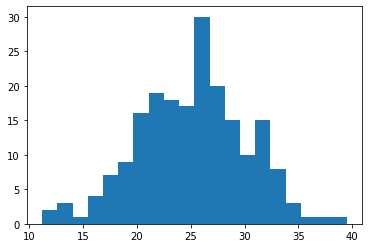

In [3]:
# hrsStudy
# normal distribution
mean, std = 25, 5
hrsWeek = np.random.normal(mean, std, 200)
plt.hist(hrsWeek, 20)

To complete the dataset I also simulated final Leaving Cert points, again using a normal distribution, with the mean set to 400 points and a standard deviation of 50.

(array([ 2.,  0.,  1.,  4.,  9., 11., 17., 15., 25., 25., 20., 16., 22.,
        16.,  7.,  4.,  3.,  0.,  1.,  2.]),
 array([253.69746308, 268.87926707, 284.06107107, 299.24287507,
        314.42467907, 329.60648306, 344.78828706, 359.97009106,
        375.15189505, 390.33369905, 405.51550305, 420.69730705,
        435.87911104, 451.06091504, 466.24271904, 481.42452303,
        496.60632703, 511.78813103, 526.96993503, 542.15173902,
        557.33354302]),
 <a list of 20 Patch objects>)

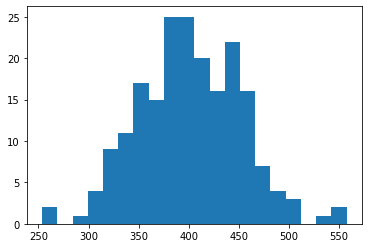

In [6]:
# Leaving Cert points
points = np.random.normal(400, 50, 200)
plt.hist(points, 20)

The output of the distribution function was float values, which needed to be rounded to serve as simulated points. This was done using Pandas.

In [8]:
# intiating a new dataframe using the 'points' variable, then passing its contents to a new variable.
dfpoints = pd.DataFrame(data={'Points': points})

# using the DataFrame.round() function to round the contents of 'dfpoints'
dfpoints = pd.DataFrame.round(dfpoints)

dfpoints # checking the new rounded values

,Points
0,454.0
1,421.0
2,464.0
3,432.0
4,334.0
...,...
195,407.0
196,359.0
197,453.0
198,400.0


Finally, the four variables and the dfpoints dataframe object are passed to a new dataframe using Pandas to generate the full dataset.

In [118]:
df = pd.DataFrame(data={'Year born': yearBorn, 'M/F': sex, 'Dublin?': dublinYesNo, 'Hours study per week': hrsWeek})
df['Points'] = dfpoints
df

,Year born,M/F,Dublin?,Hours study per week,Points
0,2002,female,0,21.672340,406.0
1,2003,female,0,26.688251,323.0
2,2002,female,1,11.079238,479.0
3,2003,female,0,23.847048,409.0
4,2003,male,0,25.085708,357.0
...,...,...,...,...,...
195,2003,male,0,29.602087,404.0
196,2003,male,1,11.966545,404.0
197,2003,female,0,17.740484,335.0
198,2003,male,0,23.660690,388.0


### References

https://www.independent.ie/irish-news/education/exams/number-of-students-sitting-leaving-cert-surges-to-highest-level-in-15-years-thanks-to-millennium-baby-boom-38177189.html

https://pythonexamples.org/pandas-dataframe-add-column/

https://www.cso.ie/en/csolatestnews/presspages/2017/census2016profile2-populationdistributionandmovements/

https://data.cso.ie/table/E2001

https://www.worldometers.info/world-population/ireland-population/

https://www.worldometers.info/demographics/ireland-demographics/#urb

https://github.com/donalbuggy/fundamentalsOfDataAnalysis/blob/main/fundamentalsOfDataAnalysisTasks.ipynb